# **Load The Dataset** 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [6]:
train_dir='Skin Cancer Malignant vsBenign/train/'
test_dir='Skin Cancer Malignant vsBenign/test/'

In [7]:
size=331

from tensorflow.keras.applications.nasnet import  preprocess_input
import tensorflow as tf
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    #rescale=1/255.0,
    preprocessing_function=preprocess_input,
    validation_split=0.1,
).flow_from_directory(train_dir,batch_size=16,target_size=(size,size),subset="training",shuffle=True)


Found 2374 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

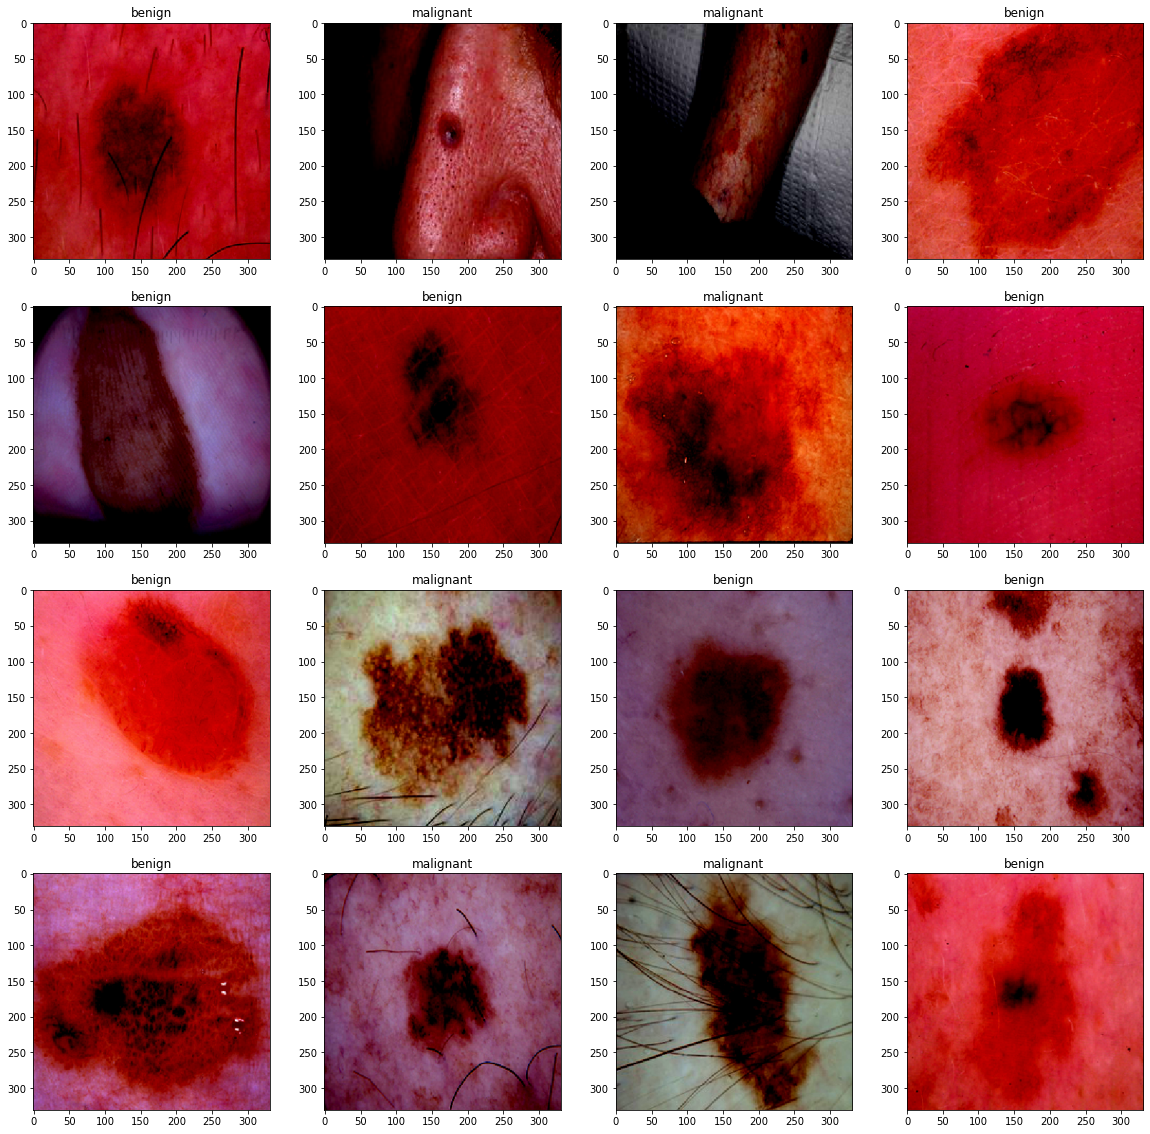

In [8]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [9]:
classes

['benign', 'malignant']

In [10]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1/255.0,
    preprocessing_function=preprocess_input,
    validation_split=0.1,
).flow_from_directory(train_dir,batch_size=16,target_size=(size,size),subset='validation',shuffle=False)


Found 263 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

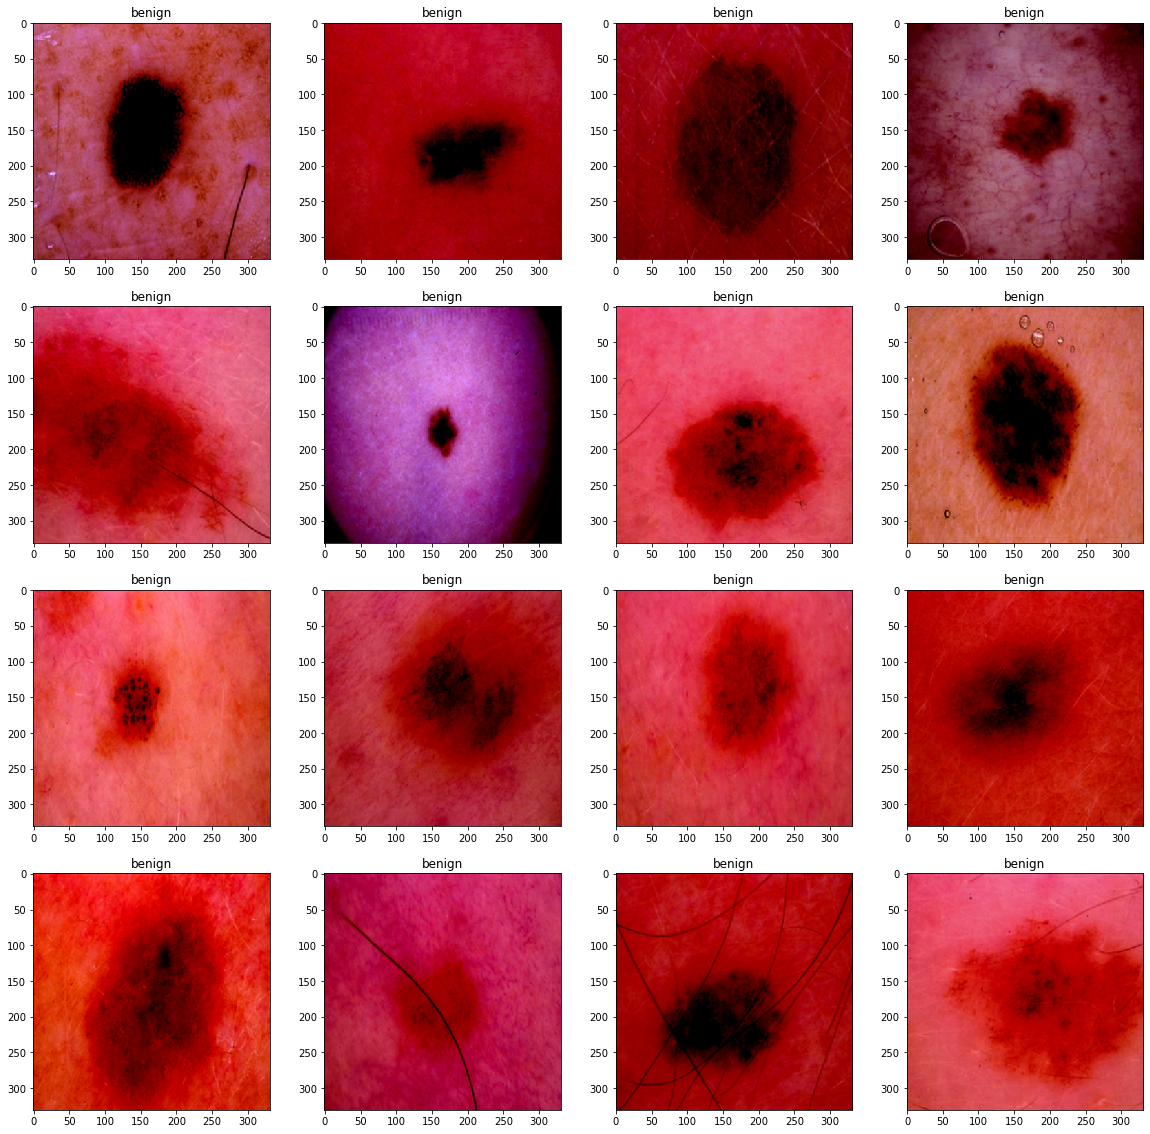

In [11]:
classes=list(valid_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in valid_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [12]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1/255.0,
    preprocessing_function=preprocess_input
).flow_from_directory(test_dir,batch_size=16,target_size=(size,size),shuffle=False)


Found 660 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

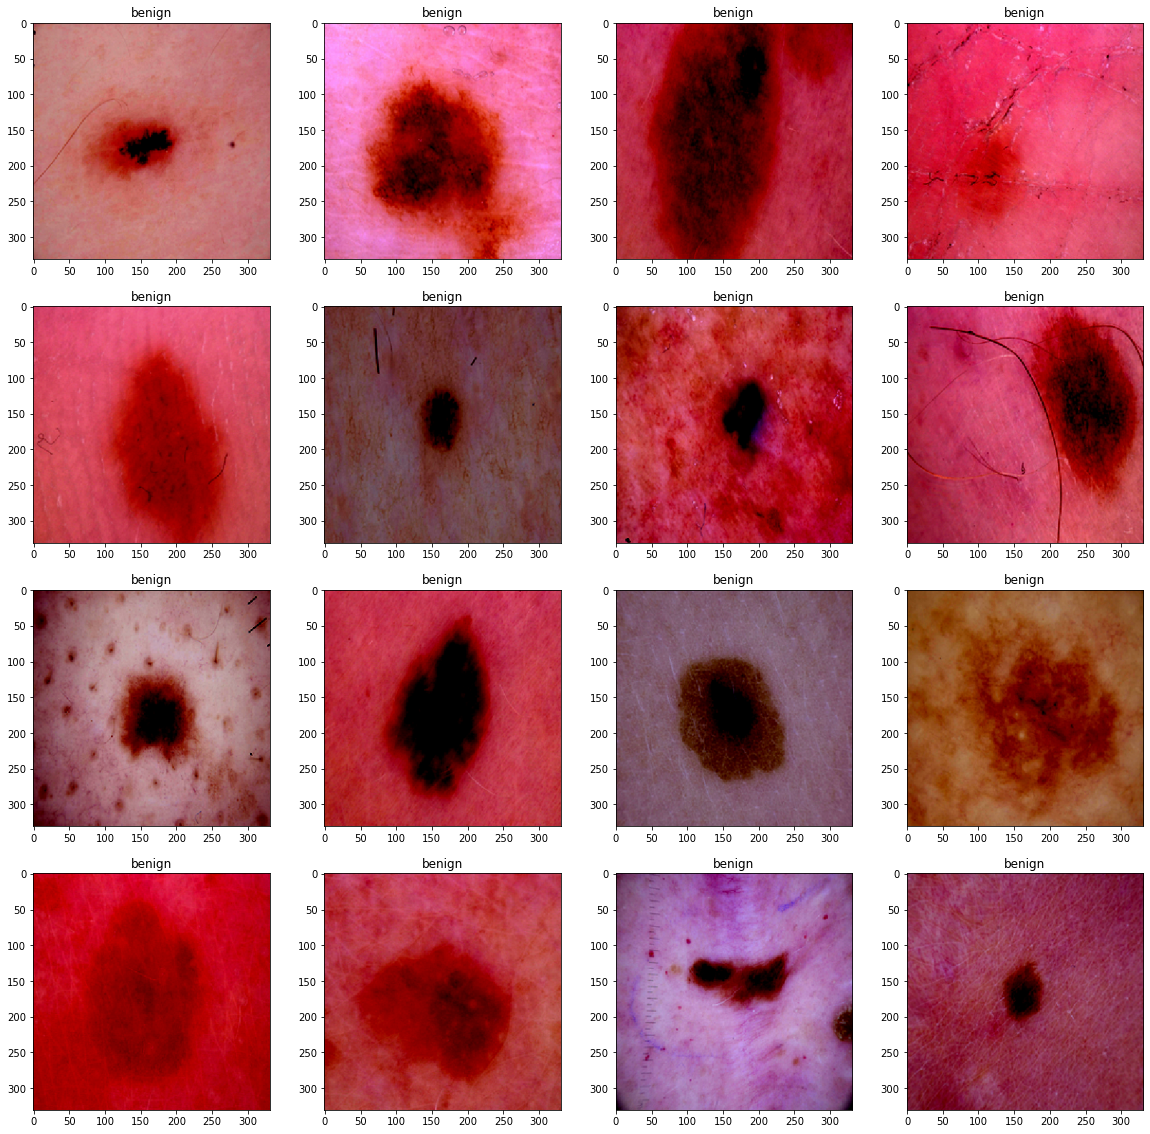

In [26]:
classes=list(test_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in test_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

# **Creating the model**

In [ ]:
# Feature extraction
# NASNetLarge img(331,331)
feature_model = tf.keras.applications.NASNetLarge(weights="imagenet", include_top=False)

features = feature_model.predict(X_train)
print(features.shape)
print(features[0].flatten().shape)


In [14]:
# Creating the model using the Sequential API
# input_tensor = keras.layers.Input(shape=(224, 224,3))

# NASNetLarge img(331,331)
base_model = tf.keras.applications.NASNetLarge(weights="imagenet", include_top=False)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(2, activation="softmax")(avg)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

"""
# InceptionResNetV2 img(299,299)
base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights="imagenet",include_top=False)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
H1 = tf.keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal")(avg)
B1 = tf.keras.layers.BatchNormalization()(H1)
H2 = tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal")(B1)
B2 = tf.keras.layers.BatchNormalization()(H2)
H3 = tf.keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal")(B2)
B3 = tf.keras.layers.BatchNormalization()(H3)
output = tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")(B3)

model = tf.keras.Model(inputs=base_model.input, outputs=output)
"""

"""
# Xception img(299,299)
base_model = tf.keras.applications.xception.Xception(weights="imagenet",include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation="sigmoid")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
"""

"""
# InceptionV3 img(299,299)
base_model = tf.keras.applications.inception_v3.InceptionV3(weights="imagenet",include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation="sigmoid")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
"""

"""
# InceptionResNetV2 img(299,299)
base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights="imagenet",include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation="sigmoid")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
"""

"""
# VGG16 img(224,224)
base_model = tf.keras.applications.vgg16.VGG16(weights="imagenet",include_top=False,
                         input_tensor=keras.layers.Input(shape=(512, 512,3)))
                 
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
"""

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_260 (Activation)     (None, 165, 165, 96) 0           stem_bn1[0][0]                   
____________________________________________________________________________________________

__________________________________________________________________________________________________
separable_conv_1_pad_reduction_ (None, 25, 25, 672)  0           activation_444[0][0]             
__________________________________________________________________________________________________
activation_446 (Activation)     (None, 11, 11, 672)  0           reduction_add_1_reduce_12[0][0]  
__________________________________________________________________________________________________
separable_conv_1_bn_reduction_r (None, 11, 11, 672)  2688        separable_conv_1_reduction_right2
__________________________________________________________________________________________________
separable_conv_1_reduction_righ (None, 11, 11, 672)  468384      separable_conv_1_pad_reduction_ri
__________________________________________________________________________________________________
separable_conv_1_reduction_left (None, 11, 11, 672)  457632      activation_446[0][0]             
__________

In [15]:
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
# Freeze the weights of the pretrained layers
for layer in model.layers[:-2]:
    layer.trainable = False

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999)
model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

# Training the model
history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator) ,
                    epochs= 5,  
                    validation_data= valid_generator)




Epoch 1/5
149/149 [==============================] - 96s 546ms/step - loss: 0.4918 - accuracy: 0.7881 - val_loss: 0.5749 - val_accuracy: 0.7224
Epoch 2/5
149/149 [==============================] - 73s 493ms/step - loss: 0.3765 - accuracy: 0.8387 - val_loss: 0.6541 - val_accuracy: 0.7643
Epoch 3/5
149/149 [==============================] - 73s 493ms/step - loss: 0.3293 - accuracy: 0.8660 - val_loss: 0.5199 - val_accuracy: 0.8099
Epoch 4/5
149/149 [==============================] - 74s 496ms/step - loss: 0.2856 - accuracy: 0.8783 - val_loss: 0.5921 - val_accuracy: 0.7871
Epoch 5/5
149/149 [==============================] - 74s 497ms/step - loss: 0.2648 - accuracy: 0.8892 - val_loss: 0.7099 - val_accuracy: 0.7567


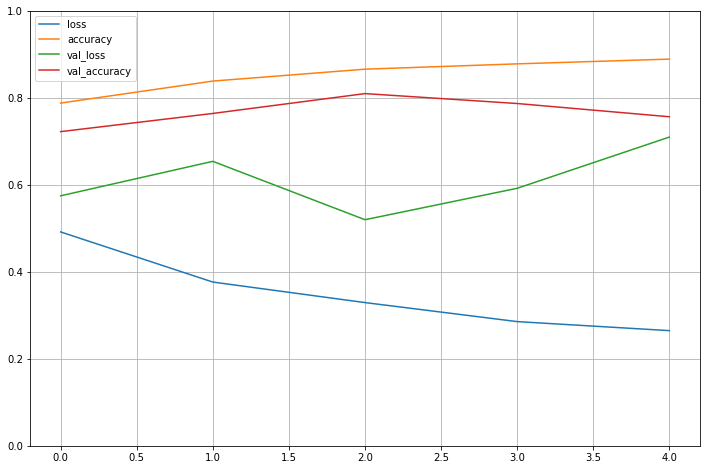

42/42 [==============================] - 20s 467ms/step - loss: 0.4379 - accuracy: 0.8288
Loss     :  0.43786606192588806
accuracy :  0.8287878632545471


In [18]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(test_generator)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


In [ ]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(test_generator))
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


Classification report : 
               precision    recall  f1-score   support

      benign       0.78      0.95      0.86       360
   malignant       0.92      0.69      0.78       300

    accuracy                           0.83       660
   macro avg       0.85      0.82      0.82       660
weighted avg       0.84      0.83      0.82       660

Confusion matrix : 



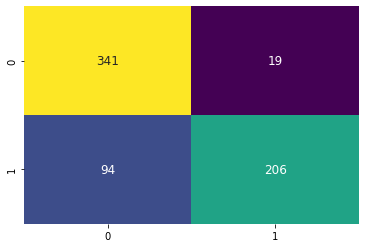

Normalized confusion matrix : 



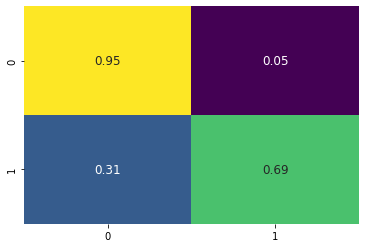

In [22]:
# Confusion Matrix
y_pred = np.argmax((model.predict(test_generator)),axis=-1)

class_names = ['benign', 'malignant']

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(test_generator.classes, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
    # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize = normalize)
    conf_matx = np.round(conf_matx, 2)
    # print(conf_matx)

    # plt.subplots(figsize=(14,8))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
    plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(test_generator.classes, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(test_generator.classes, y_pred,"true")

# Make predictions
# predicted = model.predict(X_new)



In [23]:
print("-----------------------------------------------------------------------")
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------

# Allow certain layers to participate in the training process
for layer in model.layers[-2:]:
    layer.trainable = True

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999)
model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

# Learning rate scheduling
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.0002, patience=2,
                                      monitor="val_accuracy", min_lr=0.000001)

# Interrupts training when it measures no progress on the validation set
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, monitor = "val_loss",
                                                  restore_best_weights=True)

# Training the model
history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator) ,
                    epochs= 5,  
                    validation_data= valid_generator,  
                    callbacks=[lr_scheduler, early_stopping_cb])


-----------------------------------------------------------------------
Epoch 1/5
149/149 [==============================] - 90s 527ms/step - loss: 0.2715 - accuracy: 0.8909 - val_loss: 0.5984 - val_accuracy: 0.7643
Epoch 2/5
149/149 [==============================] - 74s 498ms/step - loss: 0.2743 - accuracy: 0.8854 - val_loss: 0.7026 - val_accuracy: 0.7643
Epoch 3/5
149/149 [==============================] - 74s 496ms/step - loss: 0.1900 - accuracy: 0.9162 - val_loss: 0.7392 - val_accuracy: 0.7414
Epoch 4/5
149/149 [==============================] - 74s 497ms/step - loss: 0.1802 - accuracy: 0.9275 - val_loss: 0.7292 - val_accuracy: 0.7376
Epoch 5/5
149/149 [==============================] - 74s 498ms/step - loss: 0.1780 - accuracy: 0.9284 - val_loss: 0.7189 - val_accuracy: 0.7414


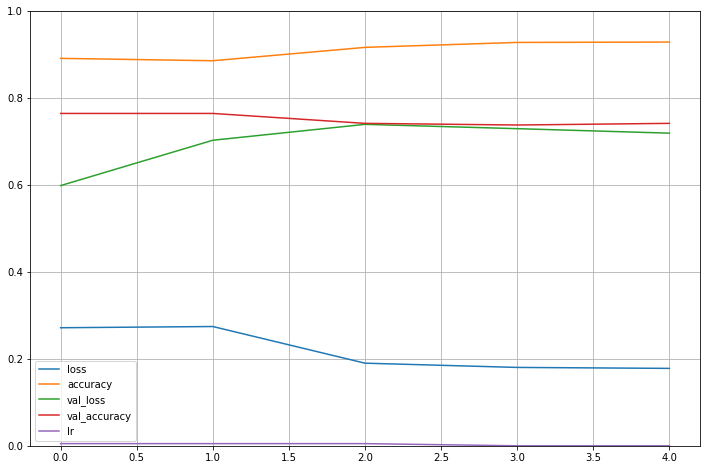

42/42 [==============================] - 19s 456ms/step - loss: 0.4438 - accuracy: 0.8500
Loss     :  0.44378116726875305
accuracy :  0.8500000238418579


In [24]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(test_generator)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


Classification report : 
               precision    recall  f1-score   support

      benign       0.81      0.95      0.87       360
   malignant       0.92      0.73      0.82       300

    accuracy                           0.85       660
   macro avg       0.87      0.84      0.84       660
weighted avg       0.86      0.85      0.85       660

Confusion matrix : 



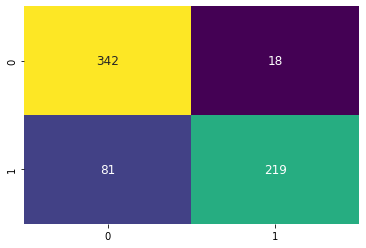

Normalized confusion matrix : 



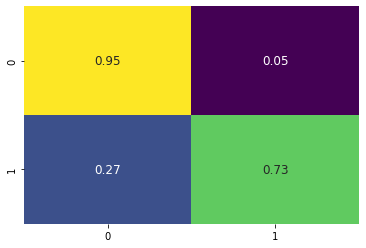

In [25]:
# Confusion Matrix
y_pred = np.argmax((model.predict(test_generator)),axis=-1)

class_names = ['benign', 'malignant']

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(test_generator.classes, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
    # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize = normalize)
    conf_matx = np.round(conf_matx, 2)
    # print(conf_matx)

    # plt.subplots(figsize=(14,8))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
    plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(test_generator.classes, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(test_generator.classes, y_pred,"true")

# Make predictions
# predicted = model.predict(X_new)



In [27]:
# Save model
model.save("chestXray_covid19_model.h5")
print("Done ...")


Done ...


# **Inference**

In [ ]:
!pip install gradio

In [ ]:
# Loading the model
my_model = tf.keras.models.load_model("chestXray_covid19_model.h5")
print("Done ...")


In [ ]:
# https://gradio.app/

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests
#from PIL import Image
import cv2

def inference(img):
    labels =["Covid19","Normal"]
    H,W,C = 331,331,3
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (H, W)) 
    img = np.array(img)
    img = img.astype("float32")/255.0
    img = img.reshape(1, H, W, C)
    pred = my_model.predict(img).flatten()
    prediction = [pred[0], 1-pred[0]]
    dictionary = dict(zip(labels, map(float, prediction)))
    return dictionary


nbr_top_classes = 2
gr.Interface(fn=inference, 
             inputs=gr.inputs.Image(), 
             outputs=gr.outputs.Label(num_top_classes=nbr_top_classes),
             theme="dark"
             ).launch(share=True) #, debug=True Use in Colab
